### Exercise

The restaurant would like to add an extension to accommodate the expanding number of customers they anticipate will visit the restaurant during the festive season. In the expansion they have decided to increase the seating area for non-smoking customers but are uncertain if they should increase the area of the restaurant that is designated for smoking customers too. They have decided to use the data captured by the server to assist them in making this decision.

Let's see if we can help them to make a decision based on the "Total bill" racked up by the smoking and non-smoking customers to see if an extension to the smoking area of the restaurant is worth their while

For this exercise you should do the following:

1. Group and sum data by the number of values for each smoker category and find the numbers of those who smoke and those who don't

2. Sort the indices and values that you will use as your y-axis and x-axis

3. Plot a bar graph of the total bill (y-axis) for smoking vs non-smoking customers (x-axis).
4. Find out the busiest days of the week as well

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import seaborn as sns

In [7]:
resturant = pd.read_excel("RestaurantData.xlsx")
resturant

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Using the groupby:
the groupby function will always categorise and group the data points based on the unique values present in the column that is being groupedby

for example, our code below shows that the groupby is being performed on the smoker column which has only 2 unique values, hence, the entire grouping was done based on the 2 unique values, so it returned 2 rows

In [10]:
grouped = resturant.groupby('smoker').sum(numeric_only = 'True').reset_index()
grouped

,smoker,total_bill,tip,size
0,No,2897.43,451.77,403
1,Yes,1930.34,279.81,224


In [12]:
groupedSex = resturant.groupby('sex').sum(numeric_only = 'True').reset_index()
groupedSex

,sex,total_bill,tip,size
0,Female,1570.95,246.51,214
1,Male,3256.82,485.07,413


In [14]:
groupedDays = resturant.groupby('day').sum(numeric_only = 'True')
groupedDays

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [16]:
#checking the index of this newly created grouped dataframe using the index keyword
groupedDays.index

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

In [18]:
print(groupedDays.iloc[0])
print()
print(groupedDays.iloc[1])

total_bill    325.88
tip            51.96
size           40.00
Name: Fri, dtype: float64

total_bill    1778.4
tip            260.4
size           219.0
Name: Sat, dtype: float64


In [20]:
#1. group by the smoker column and the sum only the total bill
grouped = resturant.groupby('smoker')['total_bill'].sum()
grouped

smoker
No     2897.43
Yes    1930.34
Name: total_bill, dtype: float64

In [22]:
#2
sortedValues = grouped.sort_values
sortedValues

<bound method Series.sort_values of smoker
No     2897.43
Yes    1930.34
Name: total_bill, dtype: float64>

In [24]:
type(grouped)

pandas.core.series.Series

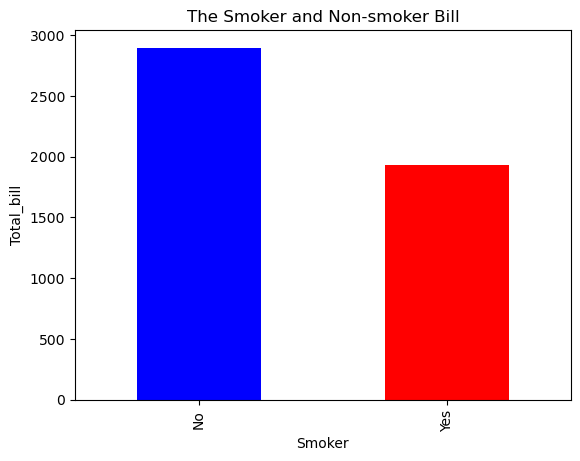

In [26]:
#3 sorted_data.plot(kind = 'bar', color = ['purple', 'green'])
grouped = resturant.groupby('smoker')['total_bill'].sum()
grouped.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Smoker')
plt.ylabel('Total_bill')
plt.title('The Smoker and Non-smoker Bill')
plt.show()

In [27]:
resturant['smoker'].count()

244

In [28]:
number = 0
for i in resturant['smoker']:
    if i == 'Yes':
        number+=1

print(f'Total number of those who smoke is {number}')

Total number of those who smoke is 93


In [30]:
number = 0
for i in resturant['smoker']:
    if i == 'No':
        number+=1

print(f'Total number of those who doesnt smoke is {number}')

Total number of those who doesnt smoke is 151


In [34]:
smoker_counts = resturant['smoker'].value_counts().reset_index()
smoker_counts.columns = ['smoker', 'total_count']
smoker_counts

,smoker,total_count
0,No,151
1,Yes,93


In [36]:
#4. Find out the busiest days of the week as well
#let us group by the day column
titleDay = resturant.groupby('day').sum(numeric_only = 'True')
titleDay

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [38]:
#to see the various bills per day
titleDay.total_bill

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [40]:
#to see the vrious sizes per day
titleDay['size']

day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

In [42]:
x = titleDay.index
x

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

In [43]:
y = titleDay['size'].sort_values()
y

day
Fri      40
Thur    152
Sun     216
Sat     219
Name: size, dtype: int64

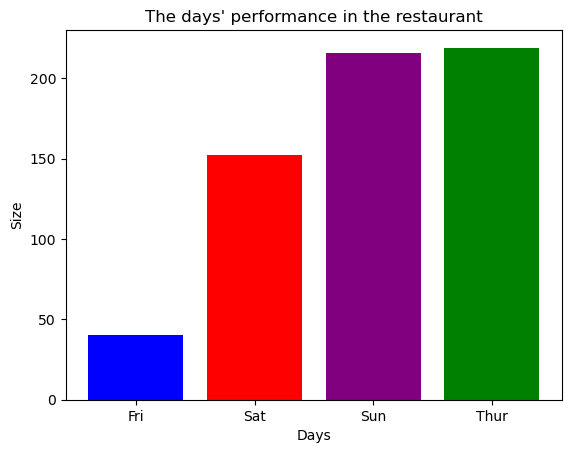

In [46]:
plt.bar(x, y, color=['blue', 'red', 'purple', 'green'])
plt.xlabel('Days')
plt.ylabel('Size')
plt.title('The days\' performance in the restaurant')
plt.show()

In [47]:
#this will discend starting from up to down
y = titleDay['size'].sort_values(ascending=False)
y

day
Sat     219
Sun     216
Thur    152
Fri      40
Name: size, dtype: int64

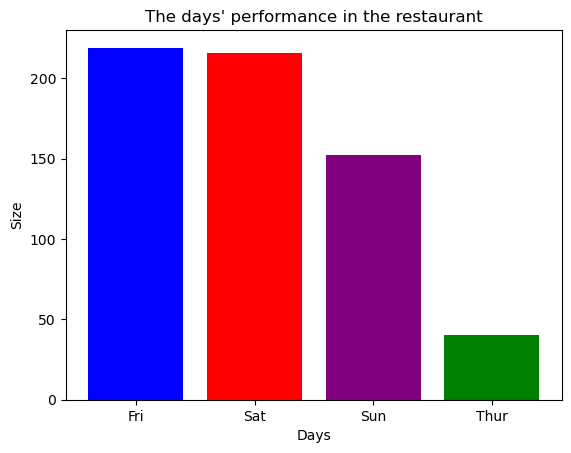

In [48]:
plt.bar(x, y, color=['blue', 'red', 'purple', 'green'])
plt.xlabel('Days')
plt.ylabel('Size')
plt.title('The days\' performance in the restaurant')
plt.show()